In [1]:
# METHOD 1
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X= iris.data
Y= iris.target
target_names = iris.target_names

In [2]:
X_meaned = X-np.mean(X,axis=0) # step 1 : center the data
cov_matrix=np.cov(X_meaned,rowvar=False) # step2 covariance matrix
eigenvalues,eigenvectors = np.linalg.eig(cov_matrix)#step 3 Eigen decomposition
# Step 4: Sort eigenvalues & eigenvectors
sorted_idx =np.argsort(eigenvalues)[::-1]
eigenvalues=eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:,sorted_idx]

print("Eigenvalues:\n", eigenvalues)
print("\nEigenvectors (columns correspond to eigenvalues):\n", eigenvectors)

Eigenvalues:
 [4.22824171 0.24267075 0.0782095  0.02383509]

Eigenvectors (columns correspond to eigenvalues):
 [[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


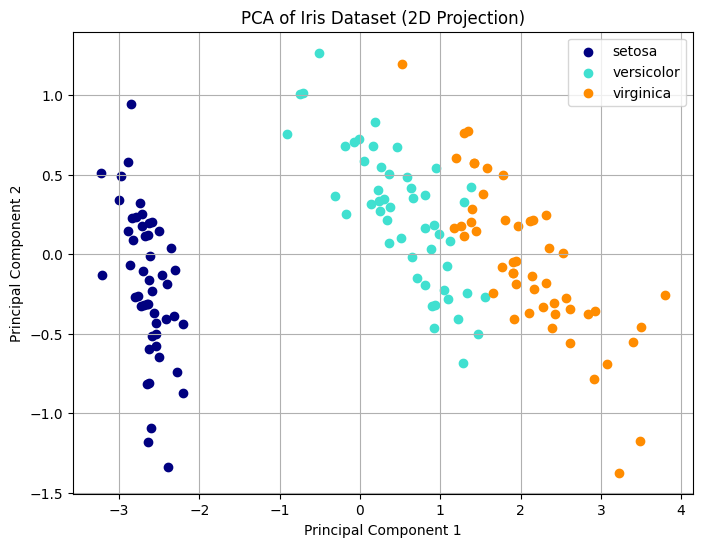

In [3]:
# Step 5: Take top-2 eigenvectors
W = eigenvectors[:, :2]

# Step 6: Transform data
X_pca = X_meaned.dot(W)

# Step 7: Visualization
plt.figure(figsize=(8,6))
colors = ['navy', 'turquoise', 'darkorange']
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[Y == i, 0], X_pca[Y == i, 1], color=color, label=target_name)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Iris Dataset (2D Projection)")
plt.legend()
plt.grid(True)
plt.show()

Explained variance ratio: [0.92461872 0.05306648]


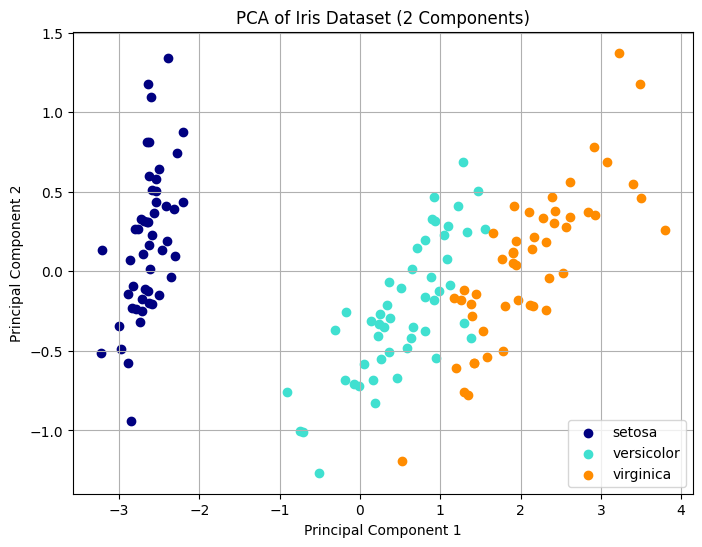

In [4]:
#METHOD 2
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

# 1. Load Iris dataset
iris = datasets.load_iris()
X = iris.data       # features
y = iris.target     # labels
target_names = iris.target_names

# 2. Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 3. Print explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)

# 4. Scatter plot
plt.figure(figsize=(8,6))
colors = ['navy', 'turquoise', 'darkorange']
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
                color=color, label=target_name)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Iris Dataset (2 Components)")
plt.legend()
plt.grid(True)
plt.show()

